In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Getting the hang of the data

In [93]:
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This dataframe contains information only about survived passengers

Do some data analysis

In [94]:
print(df.pivot_table(index = 'Survived',
                     columns = 'Pclass',
                     values = 'Age',
                     aggfunc = 'mean'))

Pclass            1          2          3
Survived                                 
0         43.695312  33.544444  26.555556
1         35.368197  25.901566  20.646118


The richer the class was, the more likely the older passenger was to survive

Сount the number of people who survived and died in each class. Use the 'Sex' column, because the sex is indicated for each passenger

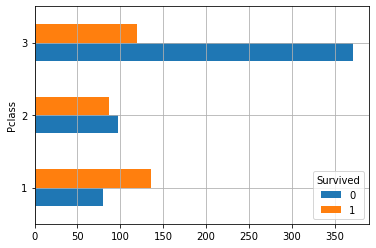

In [95]:
d = df.pivot_table(index = 'Pclass',
                     columns = 'Survived',
                     values = 'Sex',
                     aggfunc = 'count')
d.plot(kind = 'barh', grid = True)

The richer the class, the more likely it is to survive

In [96]:
print(df.pivot_table(index = 'Survived',
                     columns = 'Sex',
                     values = 'Name',
                     aggfunc = 'count'))

Sex       female  male
Survived              
0             81   468
1            233   109


More women survived than men

# Data cleansing

Removing unnecessary columns

In [97]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Columns 'PassengerId', 'Name', 'Ticket' contain useless data. The Cabin number could be useful, but most of this data is missing.

Replace the null values in 'Embarked' column with the most popular value.

In [98]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

Replace the null values in 'Age' column with madian age of passengers in corresponding class

In [99]:
age_1 = df[df['Pclass'] == 1]['Age'].median()
age_2 = df[df['Pclass'] == 2]['Age'].median()
age_3 = df[df['Pclass'] == 3]['Age'].median()

def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age_1
        elif row['Pclass'] == 2:
            return age_2
        else:
            return age_3
    return row['Age']

df['Age'] = df.apply(fill_age, axis = 1)

Convert values in 'Sex' column to Integer type

In [100]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

Create 3 columns with names according to the first letters of the name of each port. For each passenger fill 1 in the column corresponding to his port, fill 0 in other columns 

In [101]:
df[list(pd.get_dummies(df['Embarked']).columns)] = pd.get_dummies(df['Embarked'])
df.drop('Embarked', axis = 1, inplace = True)

Now dataframe contains 10 columns with 891 non-null numerical values

# Prediction

Separation the dataframe into training data (X) and target variable (y)

In [102]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

Separation of data into training (train) and test (test)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Data scaling

In [104]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Create a model with a specified number of neighbors and train.
 Find the optimal number of neighbors for maximum accuracy

In [105]:
ks = []
for k in range(1, 50, 2):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ks.append((accuracy_score(y_test, y_pred)* 100, k))

max_accuracy = ks[0][0]
max_k = ks[0][1]
for i in range(1, len(ks)):
    if ks[i][0] > max_accuracy:
        max_accuracy = ks[i][0]
        max_k = ks[i][1]
        
print('Optimal number of nearest neighbors: ', max_k, '\n' + 'Maximum accuracy: ', max_accuracy)

Optimal number of nearest neighbors:  15 
Maximum accuracy:  80.71748878923766
